<a href="https://colab.research.google.com/github/RepoRecipee/IIIT-PROJECTS-AND-LABS/blob/main/AIML_III_Module_4_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Internship Batch of 2024
# Project for Module: Perceptron and Gradient Descent

# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

Example 1 - A simple cost function
# f(x)=x2+x+1

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

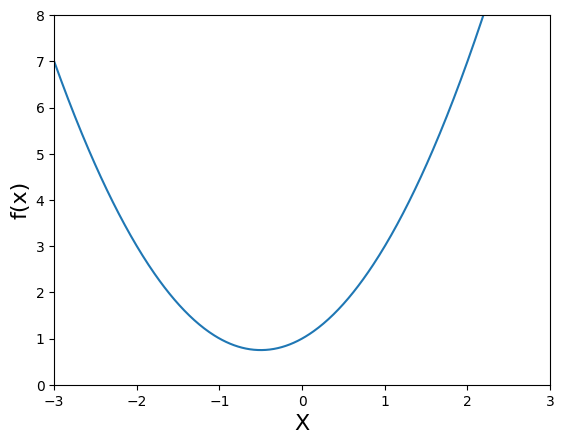

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

Slope & Derivatives
Creating a function for the derivative of  f(x)  called df(x)


In [5]:
def df(x):
    return 2 * x + 1

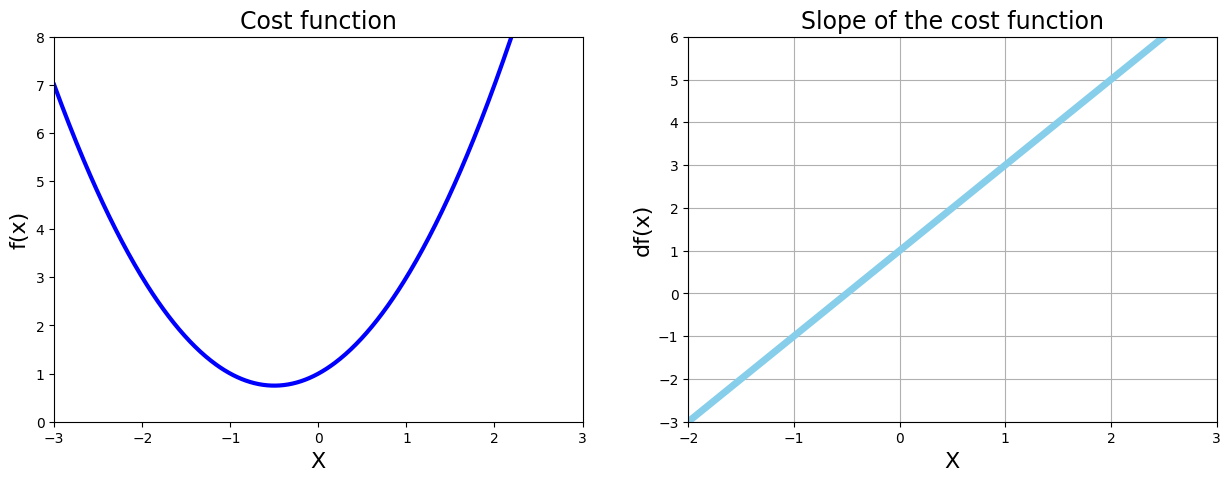

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

# Gradient Descent

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.


In [7]:
# Assuming f(x) and df(x) are defined somewhere above
# f(x) - the function whose minimum we want to find
# df(x) - the derivative of the function f(x)

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED] Calculate the gradient (slope) at the current x
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED] Update x using gradient descent

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # [REQUIRED] Append the new slope

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


# Observation
The gradient descent algorithm efficiently finds the local minimum of a function by iteratively updating the value of x in the direction opposite to the gradient. The process continues until the change in x is smaller than a defined precision, indicating convergence. The number of iterations and the accuracy of the result depend on the step_multiplier (learning rate) and precision. A well-chosen step_multiplier leads to faster and stable convergence, while the precision ensures the algorithm stops when a sufficiently accurate minimum is found.

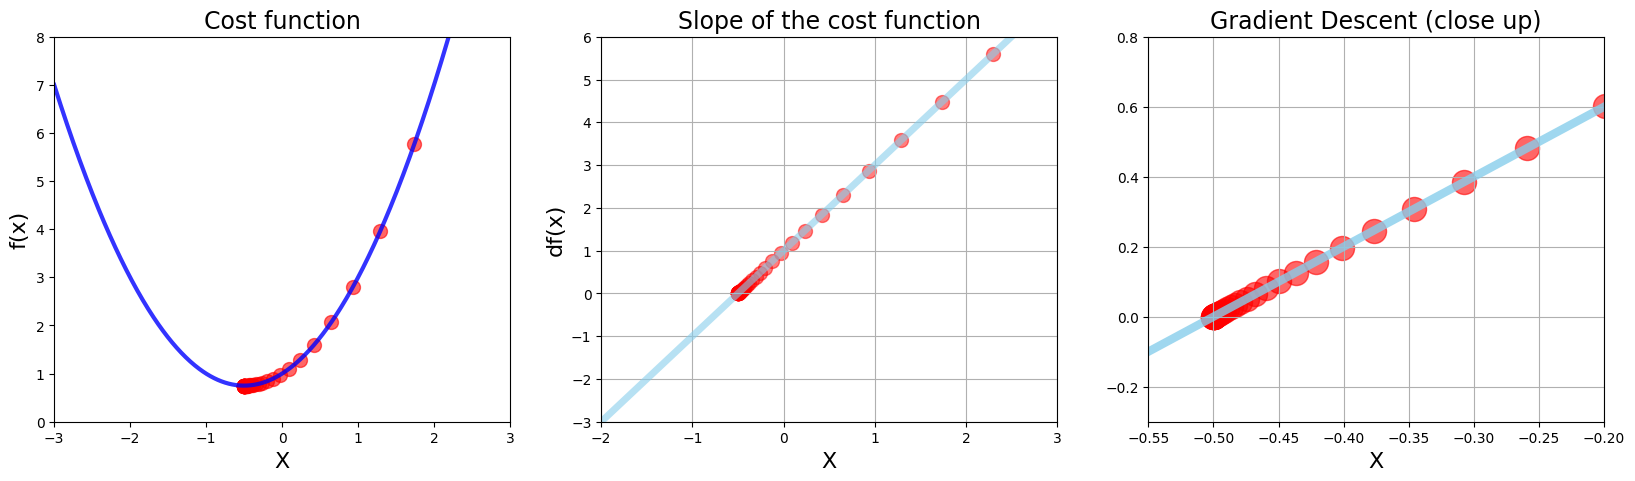

In [8]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

Example 2 - Multiple Minima vs Initial Guess & Advanced Functions
# g(x)=x4−4x2+5

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

In [10]:
import numpy as np

# Define the function g(x)
def g(x):
    return x**4 - 4*x**2 + 5  # [REQUIRED] The given function

# Define the derivative dg(x)
def dg(x):
    return 4*x**3 - 8*x  # [REQUIRED] Derivative of the function g(x)

# Make some data
x_2 = np.linspace(-2, 2, 1000)


# observation

Function g(x):
𝑔
(
𝑥
)
=
𝑥
4
−
4
𝑥
2
+
5
g(x)=x
4
 −4x
2
 +5.
Derivative dg(x): The derivative of
𝑔
(
𝑥
)
g(x) is
𝑑
𝑔
(
𝑥
)
=
4
𝑥
3
−
8
𝑥
dg(x)=4x
3
 −8x.
This will allow you to generate data points and compute both the function and its derivative.

## TASK-3 : Plot function and derivative side by side like has been done earlier

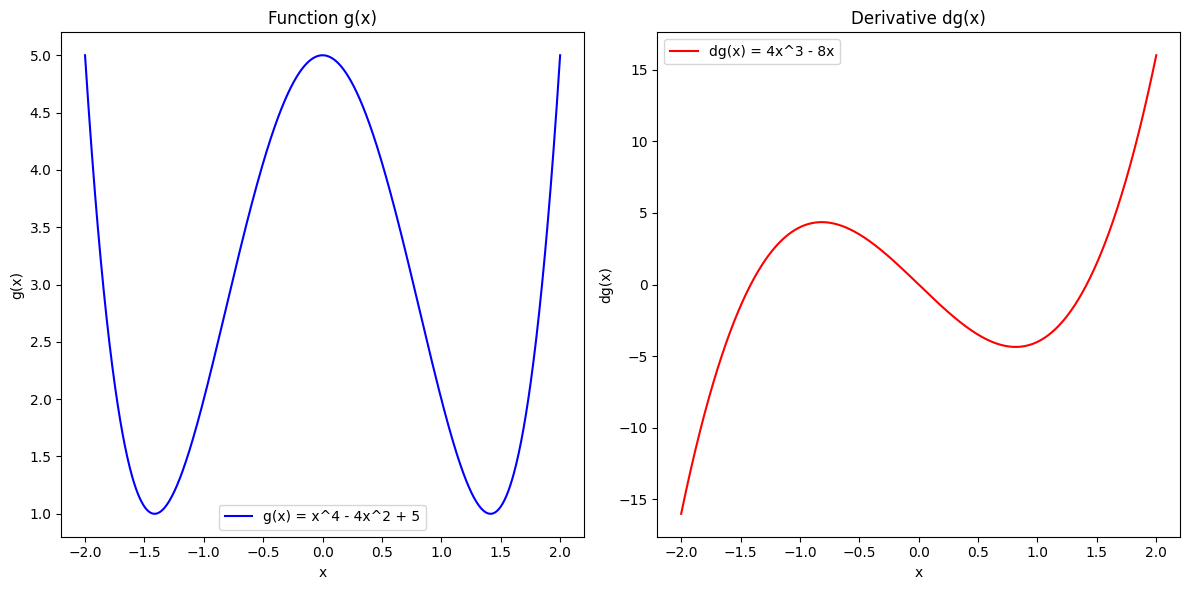

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(x)
def g(x):
    return x**4 - 4*x**2 + 5

# Define the derivative dg(x)
def dg(x):
    return 4*x**3 - 8*x

# Make some data
x_2 = np.linspace(-2, 2, 1000)
y_2 = g(x_2)
dy_2 = dg(x_2)

# Plot function and derivative side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the function g(x)
axs[0].plot(x_2, y_2, label="g(x) = x^4 - 4x^2 + 5", color='blue')
axs[0].set_title('Function g(x)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('g(x)')
axs[0].legend()

# Plot the derivative dg(x)
axs[1].plot(x_2, dy_2, label="dg(x) = 4x^3 - 8x", color='red')
axs[1].set_title('Derivative dg(x)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('dg(x)')
axs[1].legend()

plt.tight_layout()
plt.show()


# Gradient Descent

In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [ ]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

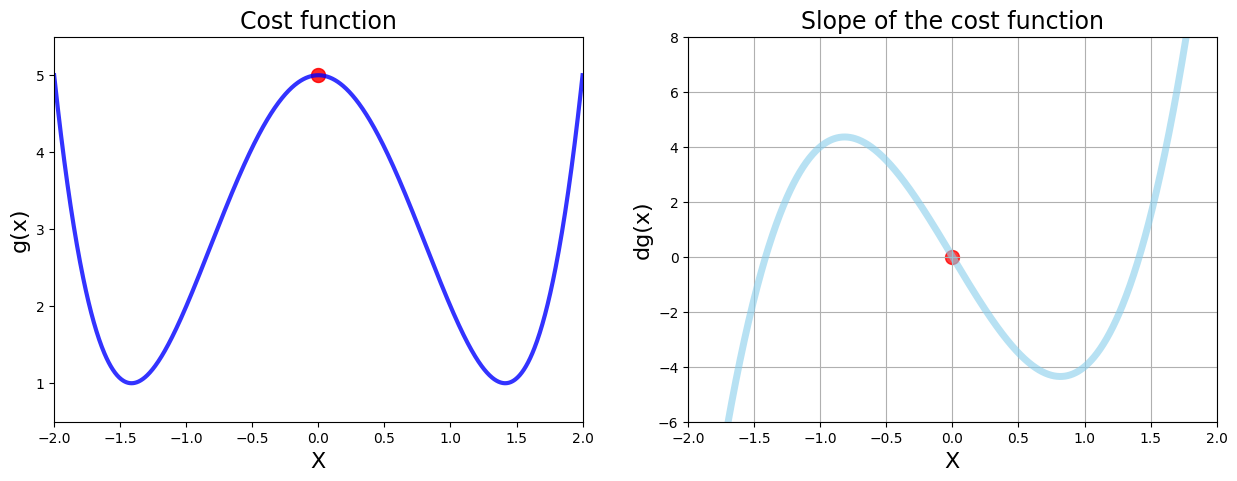

In [13]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

Example 3 - Divergence and Overflow
# h(x)=x5−2x4+2

## TASK-4 : Code the same things as they were done for the first two examples

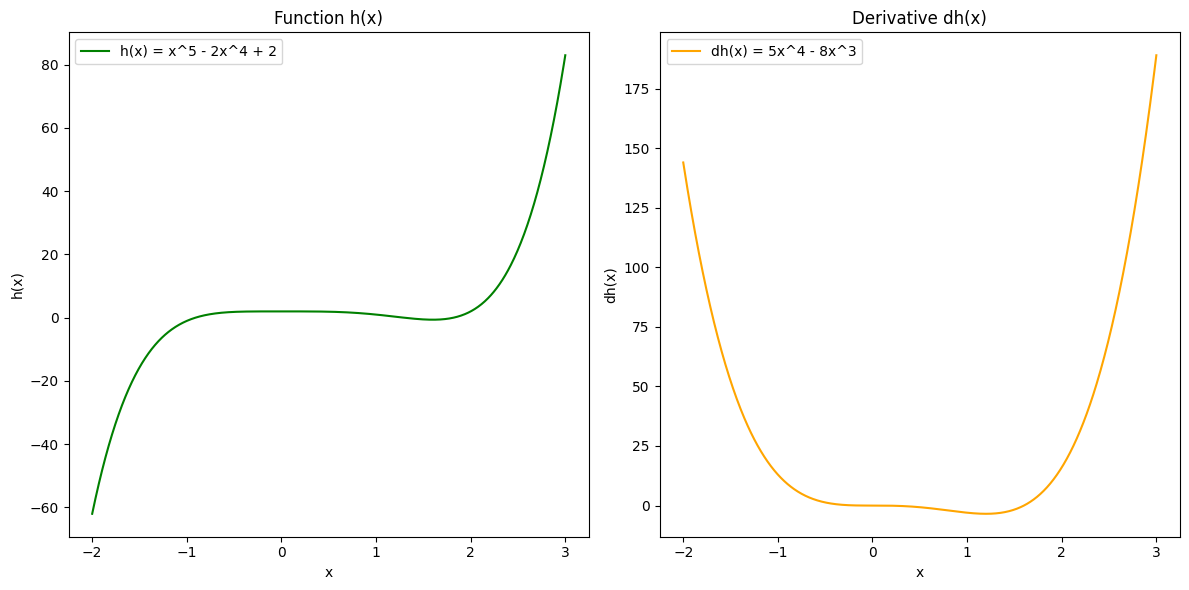

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function h(x)
def h(x):
    return x**5 - 2*x**4 + 2

# Define the derivative dh(x)
def dh(x):
    return 5*x**4 - 8*x**3

# Generate x values
x_3 = np.linspace(-2, 3, 1000)

# Compute the function and its derivative
y_3 = h(x_3)
dy_3 = dh(x_3)

# Plot function and derivative side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the function h(x)
axs[0].plot(x_3, y_3, label="h(x) = x^5 - 2x^4 + 2", color='green')
axs[0].set_title('Function h(x)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('h(x)')
axs[0].legend()

# Plot the derivative dh(x)
axs[1].plot(x_3, dy_3, label="dh(x) = 5x^4 - 8x^3", color='orange')
axs[1].set_title('Derivative dh(x)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('dh(x)')
axs[1].legend()

plt.tight_layout()
plt.show()


# The Learning Rate


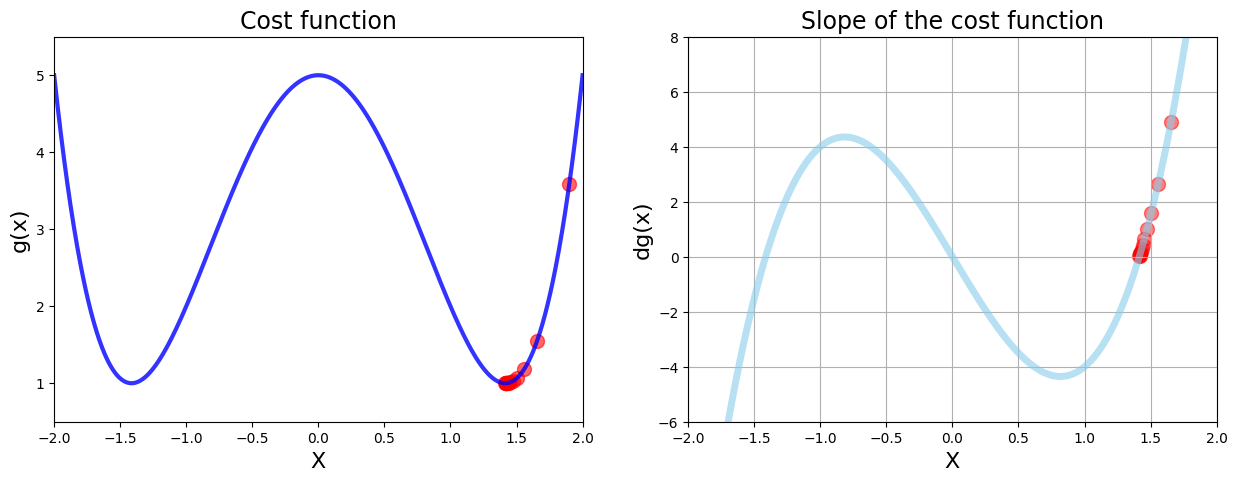

Number of steps is:  14


In [15]:

# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))


# ## TASK-5 : Run gradient descent 3 times

In [16]:
import numpy as np

# Define the function h(x)
def h(x):
    return x**5 - 2*x**4 + 2

# Define the derivative dh(x)
def dh(x):
    return 5*x**4 - 8*x**3

# Gradient Descent parameters
step_multiplier = 0.01
precision = 0.00001
max_iterations = 500

# Initial starting points
initial_values = [0.5, 1.5, 2.5]  # Different starting points

for i, start_x in enumerate(initial_values):
    print(f"Run {i+1} with starting point {start_x}:")

    new_x = start_x
    previous_x = 0
    x_list = [new_x]
    slope_list = [dh(new_x)]

    for n in range(max_iterations):
        previous_x = new_x
        gradient = dh(previous_x)
        new_x = previous_x - step_multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(dh(new_x))

        if step_size < precision:
            print(f'Loop ran this many times: {n}')
            break

    print('Local minimum occurs at:', new_x)
    print('Slope or dh(x) value at this point is:', dh(new_x))
    print('h(x) value or cost at this point is:', h(new_x))
    print('-' * 50)


Run 1 with starting point 0.5:
Loop ran this many times: 85
Local minimum occurs at: 1.5999651620664654
Slope or dh(x) value at this point is: -0.0007134342744237188
h(x) value or cost at this point is: -0.6214399875724421
--------------------------------------------------
Run 2 with starting point 1.5:
Loop ran this many times: 35
Local minimum occurs at: 1.5999664473911952
Slope or dh(x) value at this point is: -0.0006871141993727292
h(x) value or cost at this point is: -0.6214399884725204
--------------------------------------------------
Run 3 with starting point 2.5:
Loop ran this many times: 36
Local minimum occurs at: 1.6000338176875095
Slope or dh(x) value at this point is: 0.000692630156748919
h(x) value or cost at this point is: -0.6214399882886728
--------------------------------------------------


## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)

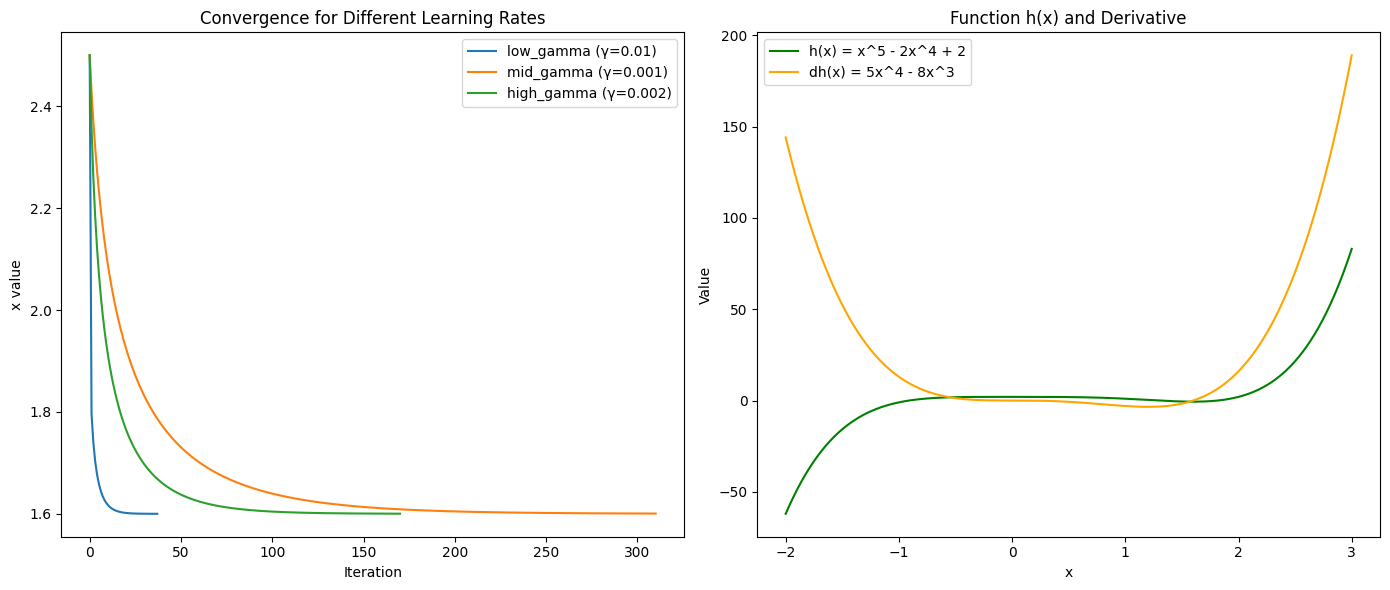

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function h(x)
def h(x):
    return x**5 - 2*x**4 + 2

# Define the derivative dh(x)
def dh(x):
    return 5*x**4 - 8*x**3

# Gradient Descent parameters
precision = 0.00001
max_iterations = 500

# Learning rates
learning_rates = {
    'low_gamma': 0.01,
    'mid_gamma': 0.001,
    'high_gamma': 0.002
}

# Initial starting point
start_x = 2.5

# Setup plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for label, step_multiplier in learning_rates.items():
    new_x = start_x
    previous_x = 0
    x_list = [new_x]
    slope_list = [dh(new_x)]

    for n in range(max_iterations):
        previous_x = new_x
        gradient = dh(previous_x)
        new_x = previous_x - step_multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(dh(new_x))

        if step_size < precision:
            break

    # Plot convergence
    axs[0].plot(x_list, label=f"{label} (γ={step_multiplier})")

# Plot function h(x) and its derivative
x_vals = np.linspace(-2, 3, 1000)
y_vals = h(x_vals)
dy_vals = dh(x_vals)

# Plot function h(x)
axs[1].plot(x_vals, y_vals, label="h(x) = x^5 - 2x^4 + 2", color='green')
axs[1].plot(x_vals, dy_vals, label="dh(x) = 5x^4 - 8x^3", color='orange')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Value')
axs[1].legend()
axs[1].set_title('Function h(x) and Derivative')

# Finalize plots
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('x value')
axs[0].set_title('Convergence for Different Learning Rates')
axs[0].legend()

plt.tight_layout()
plt.show()


In [18]:
import numpy as np

# Gradient Descent function definition
def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    new_x = initial_guess
    previous_x = 0
    x_list = [new_x]

    for _ in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)

        if step_size < precision:
            break

    return x_list

# Number of iterations
n = 100

# Running gradient descent with different learning rates
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)  # [REQUIRED]

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)  # [REQUIRED]

# Experiment with a very high learning rate
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                multiplier=0.25, precision=0.0001, max_iter=n)


## TASK-7 : Plot reduction in cost for each iteration

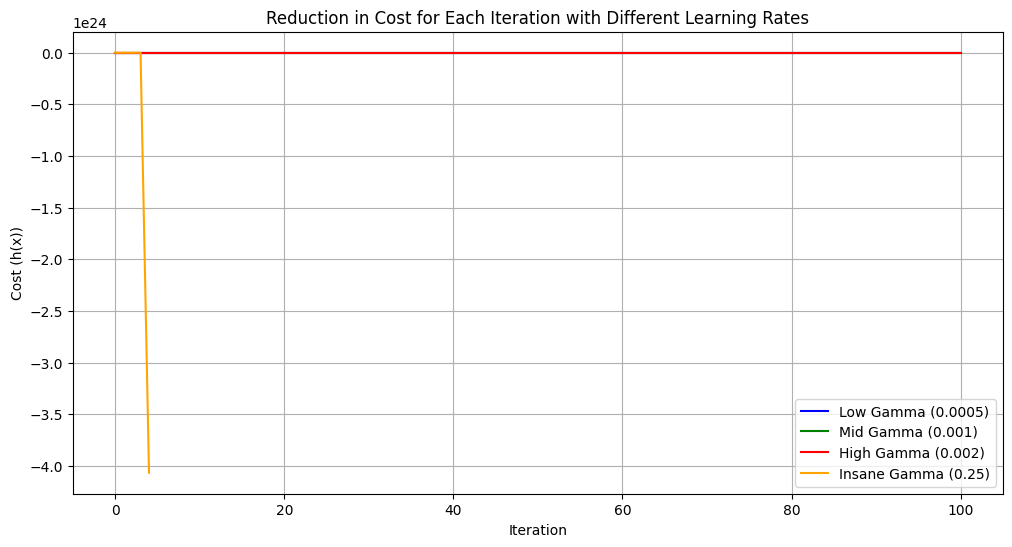

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function h(x)
def h(x):
    return x**5 - 2*x**4 + 2

# Define the derivative dh(x)
def dh(x):
    return 5*x**4 - 8*x**3

# Gradient Descent function definition
def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    new_x = initial_guess
    previous_x = 0
    x_list = [new_x]
    cost_list = [h(new_x)]  # Track the cost (function value) at each iteration

    for _ in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)

        # Check if the new_x is becoming too large before calculating the cost
        if abs(new_x) > 1e10:  # Adjust this threshold as needed
            print("Warning: 'new_x' is becoming extremely large. Gradient descent may be diverging.")
            break

        cost_list.append(h(new_x))

        if step_size < precision:
            break

    return x_list, cost_list

# Number of iterations
n = 100

# Running gradient descent with different learning rates
# ... (rest of your code remains the same)

# Number of iterations
n = 100

# Running gradient descent with different learning rates
low_gamma_x, low_gamma_cost = gradient_descent(derivative_func=dh, initial_guess=3,
                                               multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma_x, mid_gamma_cost = gradient_descent(derivative_func=dh, initial_guess=3,
                                               multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma_x, high_gamma_cost = gradient_descent(derivative_func=dh, initial_guess=3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

insane_gamma_x, insane_gamma_cost = gradient_descent(derivative_func=dh, initial_guess=1.9,
                                                    multiplier=0.25, precision=0.0001, max_iter=n)

# Plot reduction in cost for each iteration
plt.figure(figsize=(12, 6))
plt.plot(low_gamma_cost, label='Low Gamma (0.0005)', color='blue')
plt.plot(mid_gamma_cost, label='Mid Gamma (0.001)', color='green')
plt.plot(high_gamma_cost, label='High Gamma (0.002)', color='red')
plt.plot(insane_gamma_cost, label='Insane Gamma (0.25)', color='orange')

plt.xlabel('Iteration')
plt.ylabel('Cost (h(x))')
plt.title('Reduction in Cost for Each Iteration with Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


Example 4 - Data Viz with 3D Charts
Minimise
f(x,y)=13−x2−y2+1
Minimise
f(x,y)=1r+1
# where  r  is  3−x2−y2

## TASK-8 : Code the same things as they were done for the first two examples


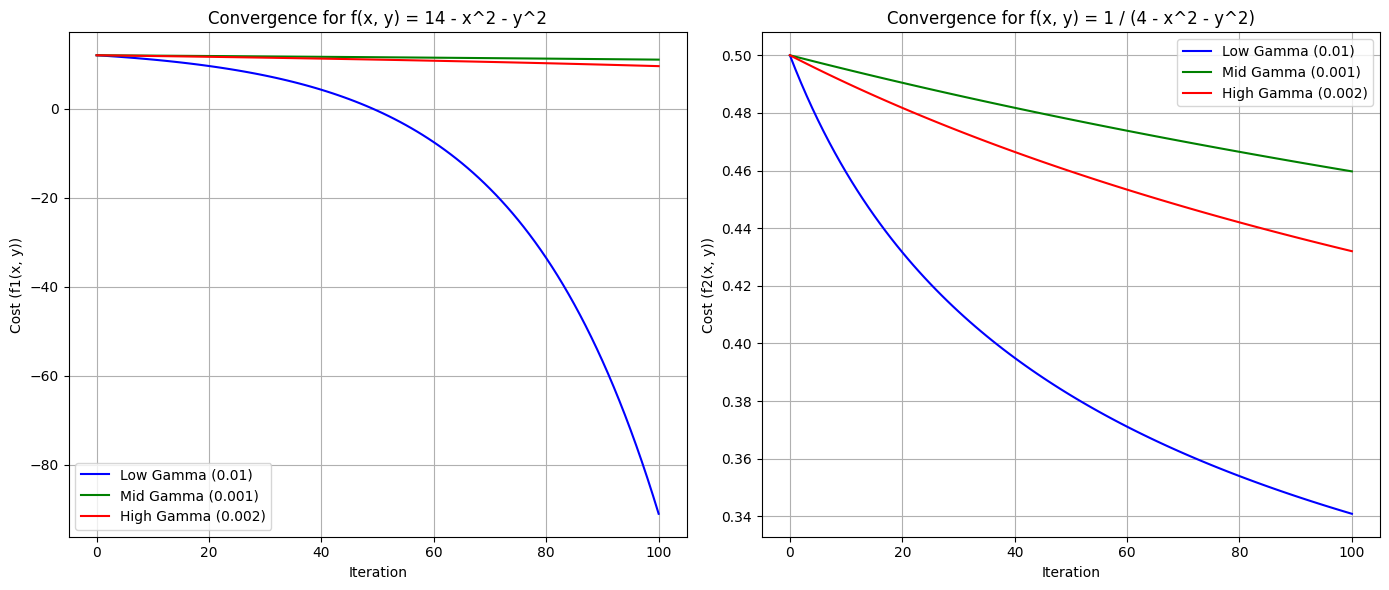

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions and their gradients
def f1(x, y):
    return 14 - x**2 - y**2

def df1(x, y):
    return np.array([-2 * x, -2 * y])

def f2(x, y):
    r = 4 - x**2 - y**2
    r = np.clip(r, 1e-10, None)  # Avoid division by zero
    return 1 / r

def df2(x, y):
    r = 4 - x**2 - y**2
    r = np.clip(r, 1e-10, None)
    return np.array([2 * x / r**2, 2 * y / r**2])

# Gradient Descent function definition
def gradient_descent_2d(func, grad_func, initial_guess, multiplier, precision, max_iter):
    x, y = initial_guess
    x_list, y_list, cost_list = [x], [y], [func(x, y)]

    for _ in range(max_iter):
        grad = grad_func(x, y)
        x_new = x - multiplier * grad[0]
        y_new = y - multiplier * grad[1]

        step_size = np.linalg.norm([x_new - x, y_new - y])
        x, y = x_new, y_new
        x_list.append(x)
        y_list.append(y)
        cost_list.append(func(x, y))

        if step_size < precision:
            break

    return x_list, y_list, cost_list

# Number of iterations
n = 100

# Run gradient descent for both functions with different learning rates
initial_guess = (1, 1)

# For f(x, y) = 14 - x^2 - y^2
low_gamma_x1, low_gamma_y1, low_gamma_cost1 = gradient_descent_2d(f1, df1, initial_guess, 0.01, 0.0001, n)
mid_gamma_x1, mid_gamma_y1, mid_gamma_cost1 = gradient_descent_2d(f1, df1, initial_guess, 0.001, 0.0001, n)
high_gamma_x1, high_gamma_y1, high_gamma_cost1 = gradient_descent_2d(f1, df1, initial_guess, 0.002, 0.0001, n)

# For f(x, y) = 1 / (4 - x^2 - y^2)
low_gamma_x2, low_gamma_y2, low_gamma_cost2 = gradient_descent_2d(f2, df2, initial_guess, 0.01, 0.0001, n)
mid_gamma_x2, mid_gamma_y2, mid_gamma_cost2 = gradient_descent_2d(f2, df2, initial_guess, 0.001, 0.0001, n)
high_gamma_x2, high_gamma_y2, high_gamma_cost2 = gradient_descent_2d(f2, df2, initial_guess, 0.002, 0.0001, n)

# Plot reduction in cost for each iteration
plt.figure(figsize=(14, 6))

# Plot for the first function
plt.subplot(1, 2, 1)
plt.plot(low_gamma_cost1, label='Low Gamma (0.01)', color='blue')
plt.plot(mid_gamma_cost1, label='Mid Gamma (0.001)', color='green')
plt.plot(high_gamma_cost1, label='High Gamma (0.002)', color='red')
plt.xlabel('Iteration')
plt.ylabel('Cost (f1(x, y))')
plt.title('Convergence for f(x, y) = 14 - x^2 - y^2')
plt.legend()
plt.grid(True)

# Plot for the second function
plt.subplot(1, 2, 2)
plt.plot(low_gamma_cost2, label='Low Gamma (0.01)', color='blue')
plt.plot(mid_gamma_cost2, label='Mid Gamma (0.001)', color='green')
plt.plot(high_gamma_cost2, label='High Gamma (0.002)', color='red')
plt.xlabel('Iteration')
plt.ylabel('Cost (f2(x, y))')
plt.title('Convergence for f(x, y) = 1 / (4 - x^2 - y^2)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [26]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


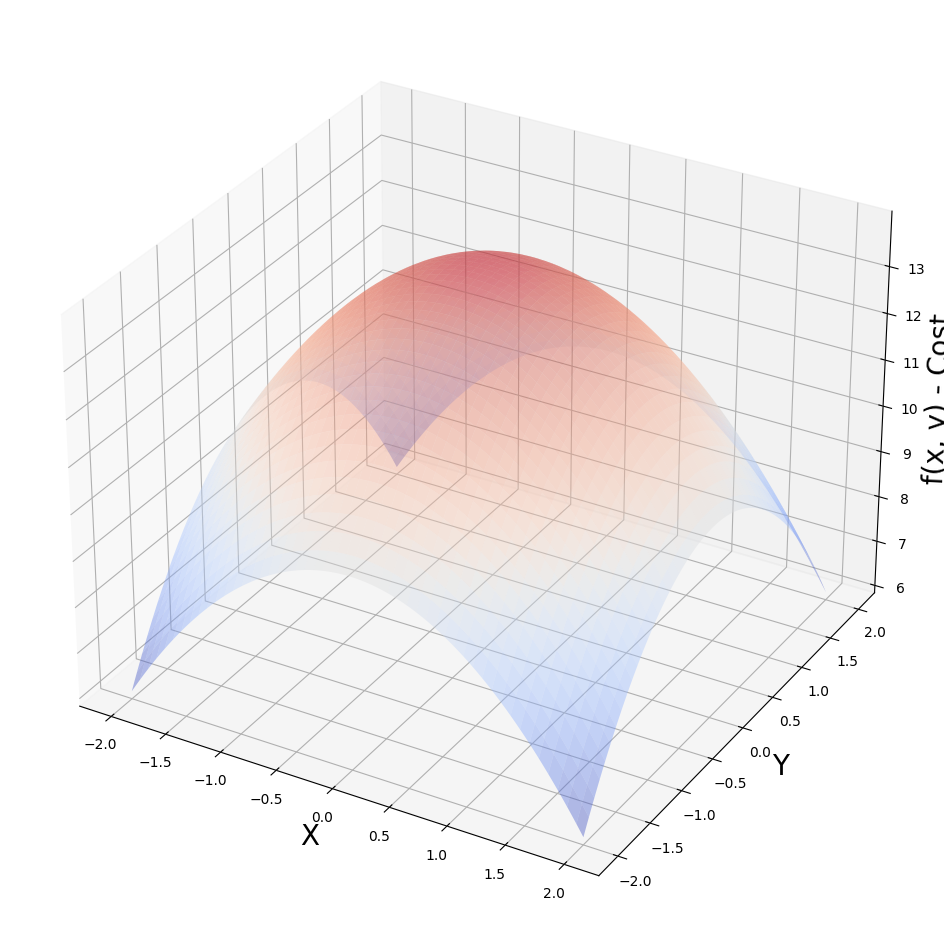

In [27]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Choose either f1 or f2, depending on which you want to plot
ax.plot_surface(x_4, y_4, f1(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)  # Replace f with f1 or f2

plt.show()



TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.
##########################

##########################

Partial Derivatives & Symbolic Computation
$$\frac{\partial f}{\partial x} = ## [REQUIRED]
# $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [31]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

# Generating 3D Plot
fig = plt.figure(figsize=(10,10))

Shape of X array (200,)
Array after meshgrid:  (200, 200)


<Figure size 1000x1000 with 0 Axes>

# Batch Gradient Descent with SymPy


In [34]:
# Assuming 'f' was intended to be a function of two variables, redefine it:
def f(x, y):
    return x**2 + y**2  # Example function, replace with your actual function

# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979496953e-48 8.76866552760853e-49]
Minimum occurs at x value of:  6.31343917987813e-49
Minimum occurs at y value of:  3.50746621104341e-49
The cost is:  5.21618334996315e-97


## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

In [35]:
def fpx(x, y):
    # Partial derivative of f(x, y) = 14 - x^2 - y^2
    return -2 * x

def fpy(x, y):
    # Partial derivative of f(x, y) = 14 - x^2 - y^2
    return -2 * y

def fpx2(x, y):
    # Partial derivative of f(x, y) = 1 / (4 - x^2 - y^2)
    denominator = (4 - x**2 - y**2) ** 2
    return 2 * x / denominator

def fpy2(x, y):
    # Partial derivative of f(x, y) = 1 / (4 - x^2 - y^2)
    denominator = (4 - x**2 - y**2) ** 2
    return 2 * y / denominator


In [36]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [-1.16881097e+40 -6.49339427e+39]
Minimum occurs at x value of:  7.012865811434208e+39
Minimum occurs at y value of:  3.896036561907893e+39
The cost is:  6.435938778090586e+79


3D Plot for the MSE Cost Function
# Make data for thetas

In [37]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


# Calc MSE using nested for loops

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


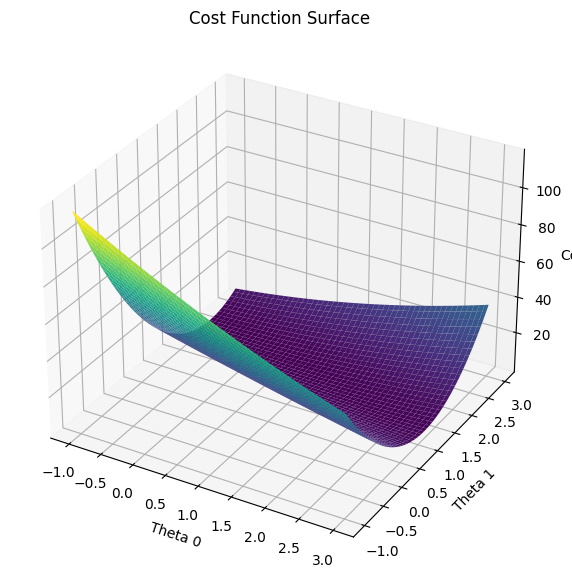

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with actual data)
x_5 = np.array([1, 2, 3, 4, 5])
y_5 = np.array([2, 4, 6, 8, 10])

# Define the Mean Squared Error function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Setup
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

# Optional: Plot the cost surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap='viridis')

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
plt.title('Cost Function Surface')
plt.show()


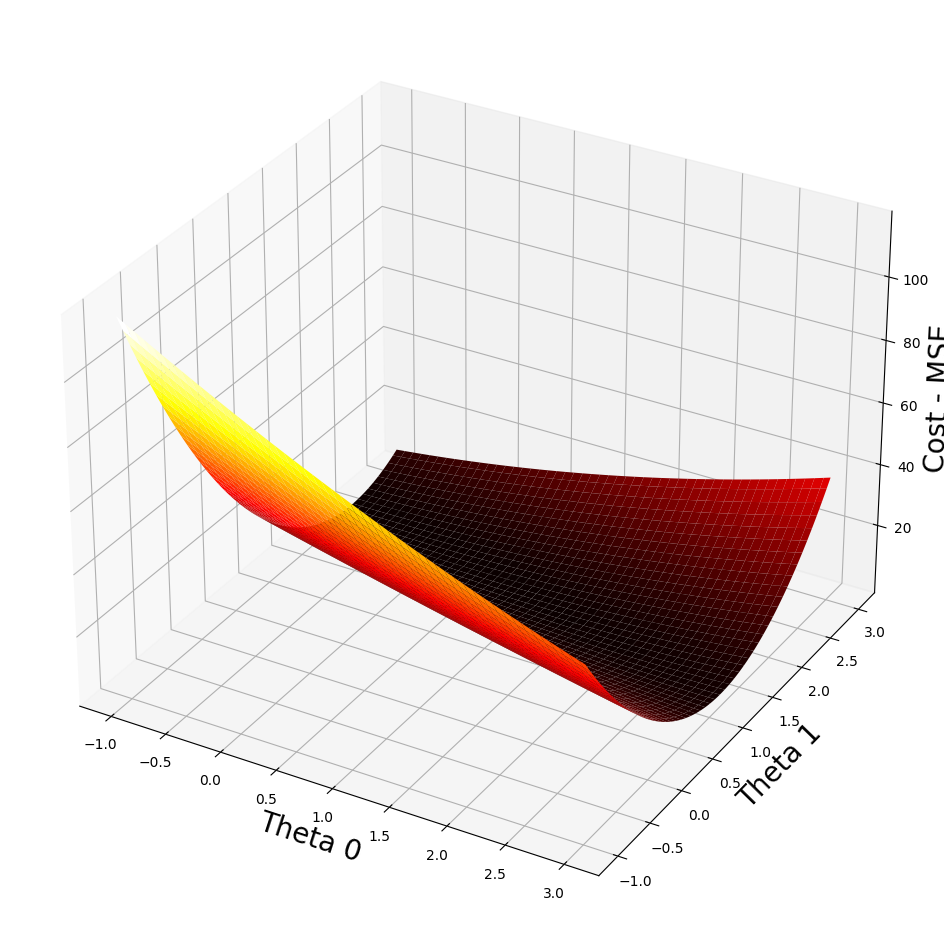

In [44]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [45]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.0001515113254715736
Min occurs at (i,j): (149, 50)
Min MSE for Theta 0 at plot_t0[111][91] 0.005025125628140614
Min MSE for Theta 1 at plot_t1[111][91] 1.9949748743718594


Partial Derivatives of MSE w.r.t.  θ0  and  θ1
∂MSE∂θ0=−2n∑i=1n(y(i)−θ0−θ1x(i))
# ∂MSE∂θ1=−2n∑i=1n(y(i)−θ0−θ1x(i))(x(i))

# MSE & Gradient Descent

In [47]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [50]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    # Return a NumPy array containing the slopes
    return np.array([theta0_slope, theta1_slope])

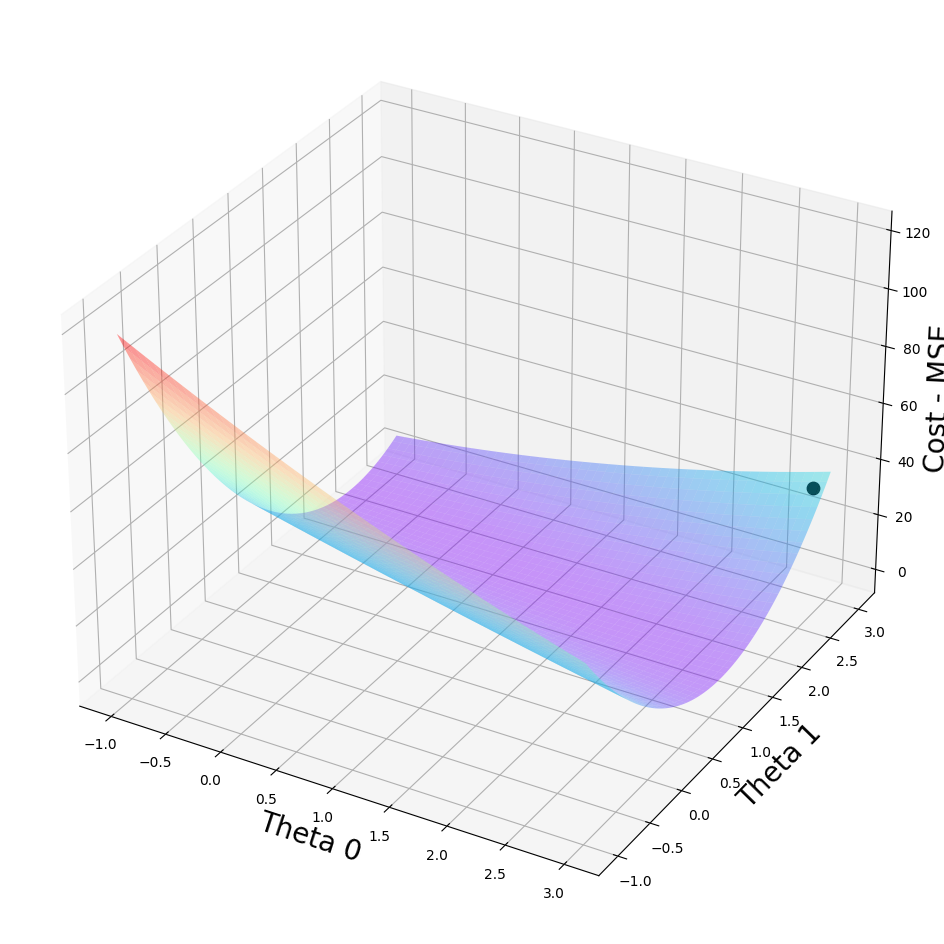

In [49]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()